In [451]:
import pickle
import random
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model



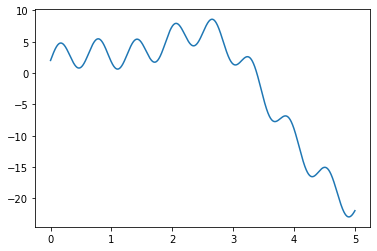

In [452]:
f = open("data.pkl", "rb")
raw = pickle.load(f)
plt.plot(raw[:,0], raw[:,1])
np.random.shuffle(raw)



In [453]:
training_size = len(raw) // 10 * 9
training_set = raw[:training_size]
print(training_set[:5])


[[2.155      7.03668554]
 [0.716      4.9425075 ]
 [0.598      2.48982902]
 [1.112      0.63326429]
 [1.313      4.18024435]]


In [454]:
test_set = raw[training_size:]
print(test_set[:5])

[[ 3.86       -6.83782322]
 [ 3.862      -6.83890145]
 [ 3.174       2.30889806]
 [ 0.711       4.86827063]
 [ 2.117       7.58081446]]


In [455]:
assert(len(training_set) + len(test_set) == len(raw))

In [456]:
partition_size = len(training_set) // 10
print(training_set[:5])

[[2.155      7.03668554]
 [0.716      4.9425075 ]
 [0.598      2.48982902]
 [1.112      0.63326429]
 [1.313      4.18024435]]


In [457]:
# for l in range(1, 10):
#     for i in range(10):
#         x = []
#         y = []
#         for j in range(len(samplingData[i])):
#             xList = []

#             for m in range(1, l + 1):
#                 xList.append(samplingData[i][j][0] ** m)
#             x.append(xList)

#             y.append(samplingData[i][j][1])
#         regrModel = linear_model.LinearRegression()

#         regrModel.fit(x, y)
#         xTest = []
#         xTestPlot = []
#         yTest = []
#         for k in range(len(testData)):
#             xTestList = []
#             xTestPlot.append(testData[k][0])
#             for m in range(1, l + 1):
#                 xTestList.append(testData[k][0] ** m)
#             xTest.append(xTestList)
#             yTest.append(testData[k][1])
#             yPred = regrModel.predict(xTest)
#             yTrain = regrModel.predict(x)

#         plt.scatter(xTestPlot, yTest)
#         plt.plot(xTestPlot, yPred)
#         plt.show()

degree 1 bias = 32.03840093062065
degree 2 bias = 6.3585554449465
degree 3 bias = 5.341266494967773
degree 4 bias = 3.4222223398743155
degree 5 bias = 3.1928859665580522
degree 6 bias = 2.6992517337316766
degree 7 bias = 2.440525790056373
degree 8 bias = 2.4126535624147247
degree 9 bias = 2.429315619965657


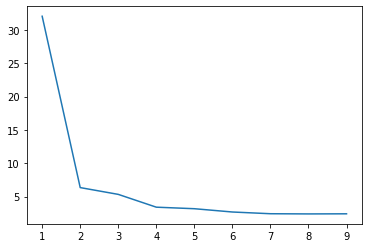

In [458]:
test_xs = test_set[:, :1]
test_ys = test_set[:, 1]

degree_vs_bias = np.zeros(shape=(9,2))

for degree in range(1,10):

    test_poly_xs = np.zeros(shape=(test_set.shape[0], degree))
    for row in range(test_set.shape[0]):
        test_poly_xs[row] = np.concatenate(
            list(test_xs[row] ** i for i in range(1, degree + 1))
        )

    predicted = np.zeros(shape=(test_set.shape[0], 10))

    for set_idx in range(10):
        lo = set_idx * partition_size
        hi = (set_idx + 1) * partition_size

        cur_training = training_set[lo:hi]
        train_xs = cur_training[:, :1]
        train_ys = cur_training[:, 1]
        poly = np.zeros(shape=(cur_training.shape[0], degree))
        for row in range(cur_training.shape[0]):
            np.concatenate(
                list(train_xs[row] ** i for i in range(1, degree + 1)), out=poly[row]
            )

        model = linear_model.LinearRegression()

        model.fit(poly, train_ys)

        predicted[:, set_idx] = model.predict(test_poly_xs)

    expected_val = np.sum(predicted, axis=1) / 10
    assert expected_val.shape == test_ys.shape
    degree_vs_bias[degree - 1,0] = (
        np.sum((expected_val - test_ys) ** 2) / expected_val.shape
    )

    print("degree {} bias = {}".format(degree, degree_vs_bias[degree - 1][0]))

    
#     print(predicted[1], expected_val[1])
    variance = np.sum((predicted - np.repeat(expected_val.reshape(500,1), 10, axis=1)) ** 2, axis=1) / 10
#     print("diff", np.sum((predicted - np.repeat(expected_val.reshape(500,1), 10, axis=1)) ** 2, axis=1) / 10)
#     print(variance.shape)
    variance = np.sum(variance) / test_set.shape[0]
#     print(variance)
    degree_vs_bias[degree - 1, 1] = variance
   


plt.plot(list(range(1, 10)), degree_vs_bias[:,0])

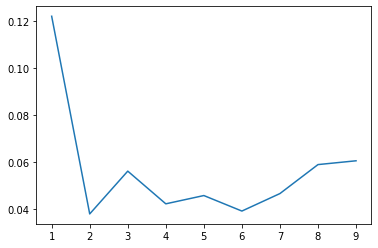

In [459]:
plt.plot(list(range(1,10)), degree_vs_bias[:,1])